In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



2024-12-21 13:07:10.423546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734764830.538808    5137 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734764830.572045    5137 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 13:07:10.803988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Define parameters
target_size = (128, 128)
batch_size = 16

In [3]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [4]:
# Create generators
train_generator = train_datagen.flow_from_directory(
    '/home/suma/dev/code/MRIDataset/train',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/home/suma/dev/code/MRIDataset/val',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)



Found 2644 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, 3, activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/home/suma/dev/code/my_venv_/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-21 13:07:34.905435: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [8]:
# Train
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)

/home/suma/dev/code/my_venv_/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8504 - loss: 1.5066 

/home/suma/dev/code/my_venv_/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 215ms/step - accuracy: 0.8508 - loss: 1.5026 - val_accuracy: 0.9412 - val_loss: 0.4061
Epoch 2/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.9612 - loss: 0.3901 - val_accuracy: 0.9572 - val_loss: 0.2927
Epoch 3/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 200ms/step - accuracy: 0.9698 - loss: 0.2597 - val_accuracy: 0.8235 - val_loss: 0.4963
Epoch 4/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 34s 202ms/step - accuracy: 0.9640 - loss: 0.2507 - val_accuracy: 0.9626 - val_loss: 0.2387
Epoch 5/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 34s 205ms/step - accuracy: 0.9675 - loss: 0.2002 - val_accuracy: 0.9733 - val_loss: 0.2001
Epoch 6/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 196ms/step - accuracy: 0.9822 - loss: 0.1677 - val_accuracy: 0.8770 - val_loss: 0.3534
Epoch 7/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 199ms/step - accuracy: 0.9752 - loss: 0.1847 - val_accuracy: 0.9412 - val_loss: 0.2589
Epoch 8/20
166/166 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9816 - loss: 0.1528 - val

In [24]:
import os
import tensorflow as tf

model_dir = "/home/suma/dev/code/MRIDataset/models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_version = 1

# Saving the model using SavedModel format (no extension needed)
saved_model_path = f"{model_dir}/{model_version}"
tf.saved_model.save(model, saved_model_path)


INFO:tensorflow:Assets written to: /home/suma/dev/code/MRIDataset/models/1/assets


INFO:tensorflow:Assets written to: /home/suma/dev/code/MRIDataset/models/1/assets


In [74]:
import tensorflow as tf
print(tf.__version__)


2.18.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


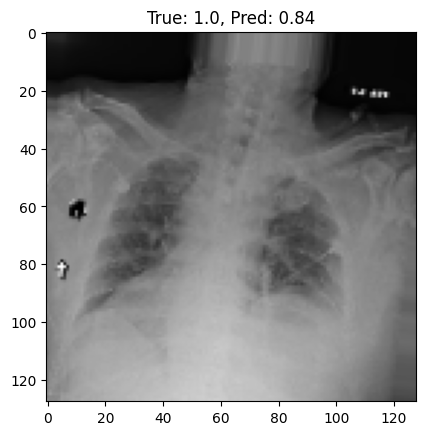

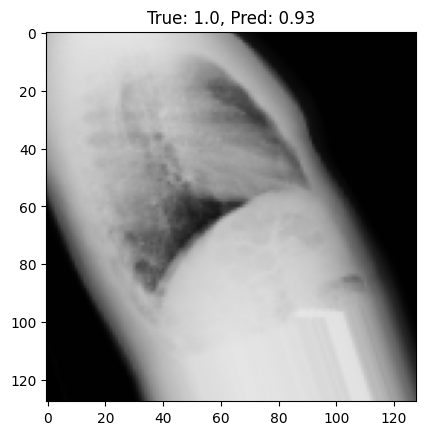

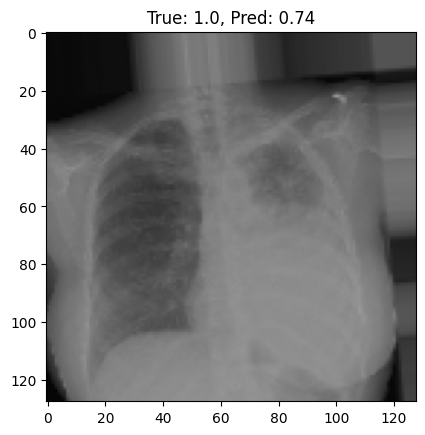

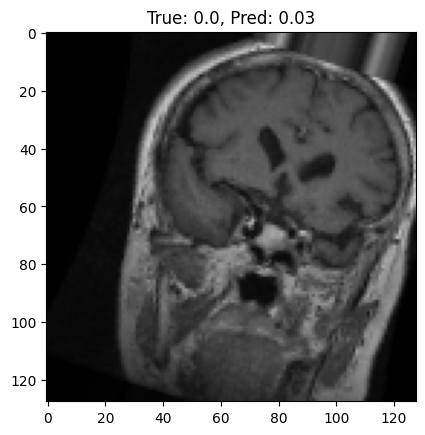

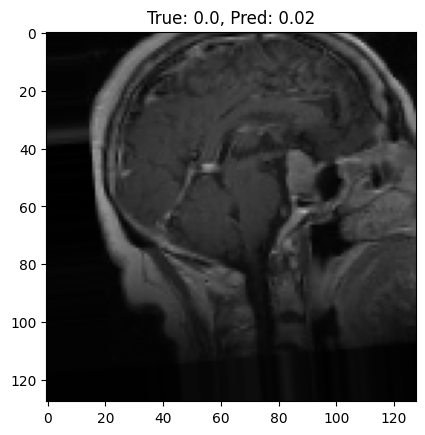

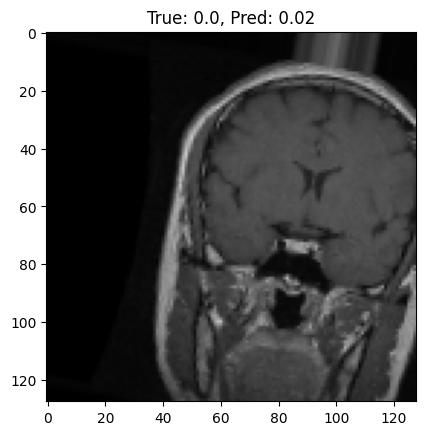

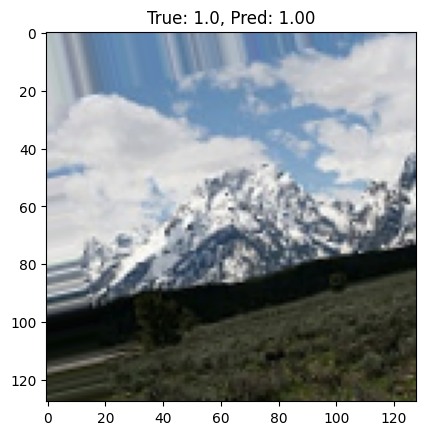

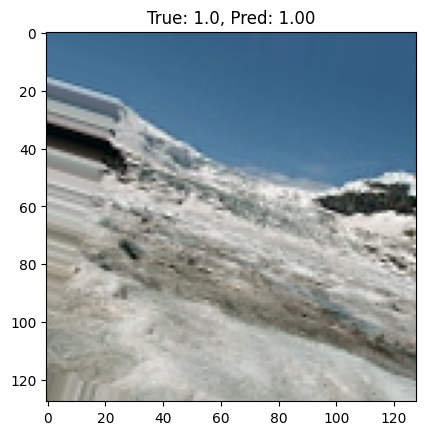

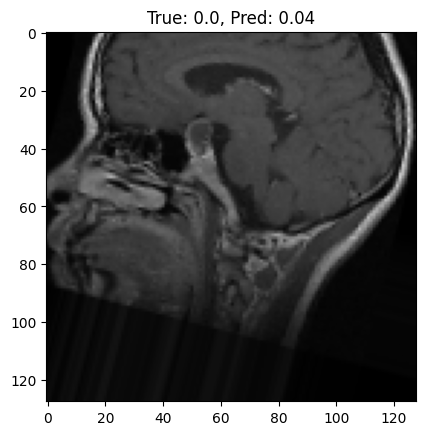

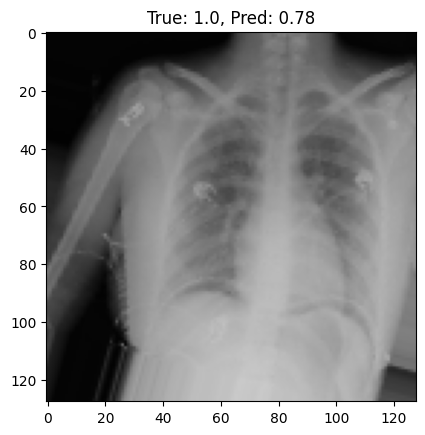

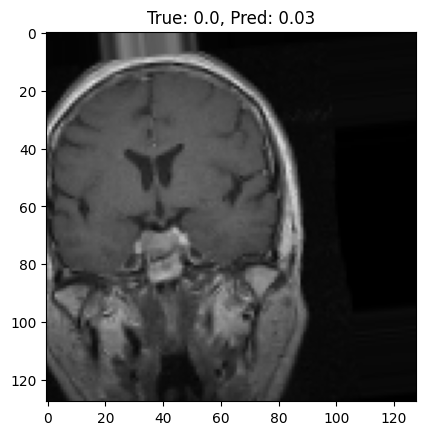

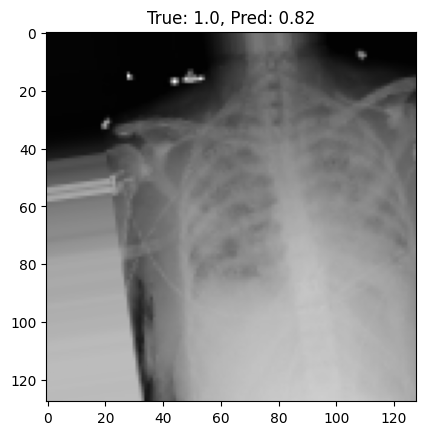

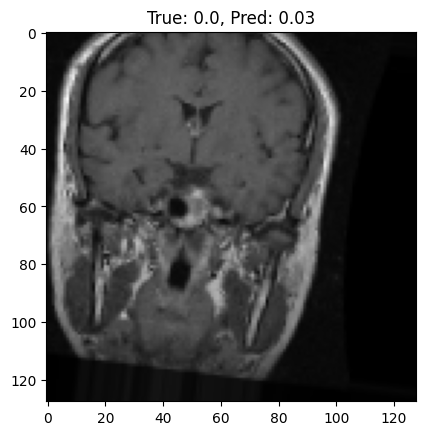

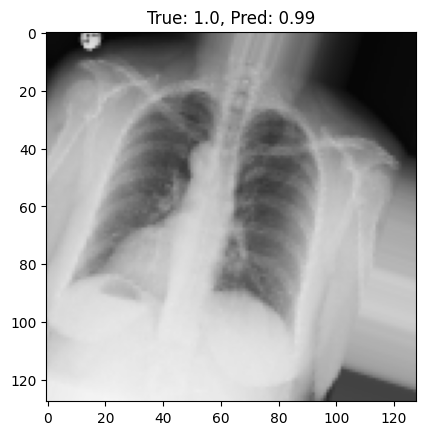

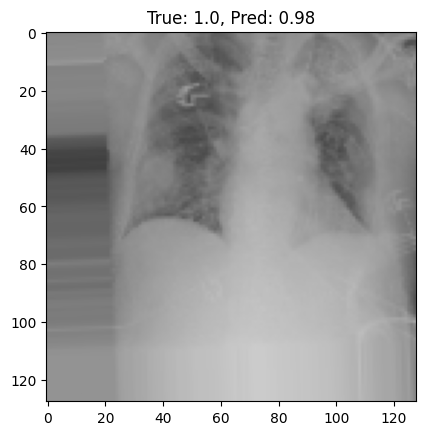

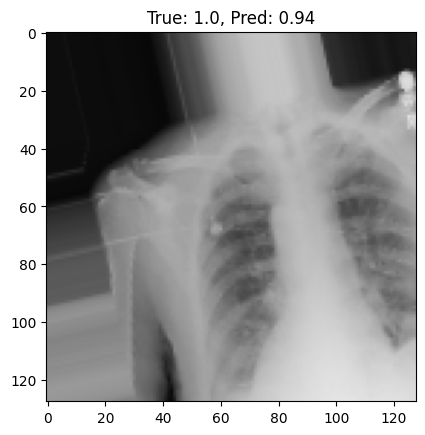

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and their labels from the validation generator
x, y = next(validation_generator)

# Predict the probabilities for the images in the batch
predictions = model.predict(x)

# Iterate over the batch of images and their corresponding predictions
for i in range(len(x)):
    plt.imshow(x[i])  # Display the image
    # Show the true label and the predicted label with the probability
    plt.title(f"True: {y[i]}, Pred: {predictions[i][0]:.2f}")  # Show predicted probability with 2 decimal places
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


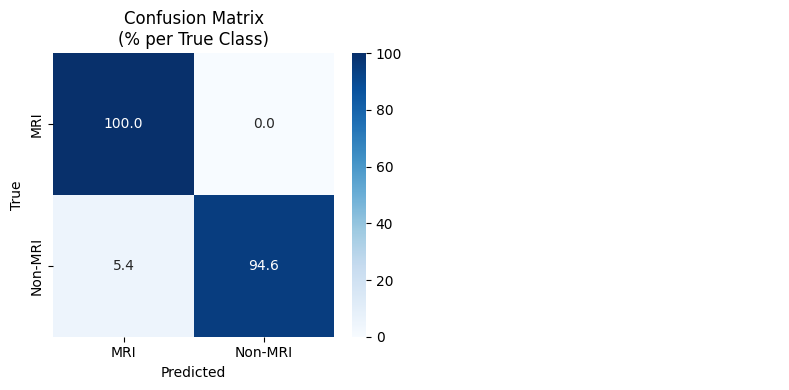


Detailed Statistics:
MRI Class Accuracy: 100.0%
Non-MRI Class Accuracy: 94.6%
Total MRI images: 75
Total Non-MRI images: 112


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reset validation generator
validation_generator.reset()

# Get predictions for all validation data
all_y_true = []
all_y_pred = []

# Get number of batches
num_batches = len(validation_generator)

# Iterate through all batches
for _ in range(num_batches):
    batch_x, batch_y = next(validation_generator)
    batch_pred = model.predict(batch_x)
    batch_pred = (batch_pred > 0.5).astype(int)
    
    all_y_true.extend(batch_y)
    all_y_pred.extend(batch_pred)

# Convert to numpy arrays
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred).flatten()

# Calculate confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)

# Calculate percentages for each class
mri_correct = (cm[0,0] / (cm[0,0] + cm[0,1])) * 100
non_mri_correct = (cm[1,1] / (cm[1,0] + cm[1,1])) * 100

# Create percentage matrix
cm_percentages = np.zeros((2,2))
# MRI row (true MRI)
cm_percentages[0,0] = (cm[0,0] / (cm[0,0] + cm[0,1])) * 100
cm_percentages[0,1] = (cm[0,1] / (cm[0,0] + cm[0,1])) * 100
# Non-MRI row (true Non-MRI)
cm_percentages[1,0] = (cm[1,0] / (cm[1,0] + cm[1,1])) * 100
cm_percentages[1,1] = (cm[1,1] / (cm[1,0] + cm[1,1])) * 100

# Create figure with adjusted size
plt.figure(figsize=(8, 4))

# Create subplot layout: one for heatmap, one for text
plt.subplot(1, 2, 1)
sns.heatmap(cm_percentages, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=['MRI', 'Non-MRI'],
            yticklabels=['MRI', 'Non-MRI'])
plt.title('Confusion Matrix\n(% per True Class)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Add text annotations in separate subplot
plt.subplot(1, 2, 2)
plt.axis('off')


plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\nDetailed Statistics:")
print(f"MRI Class Accuracy: {mri_correct:.1f}%")
print(f"Non-MRI Class Accuracy: {non_mri_correct:.1f}%")
print(f"Total MRI images: {cm[0,0] + cm[0,1]}")
print(f"Total Non-MRI images: {cm[1,0] + cm[1,1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


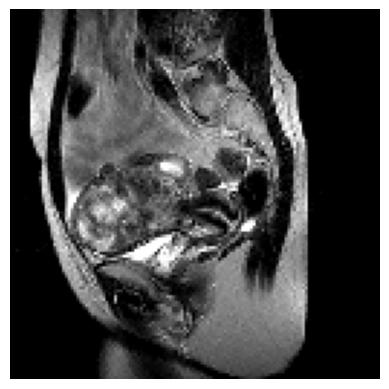

The image is predicted to be class 0 with a probability of 0.09.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

# Function to load and preprocess the uploaded image
def load_and_predict_image(image_path, model, target_size=(128, 128)):
    # Load the image
    img = image.load_img(image_path, target_size=target_size)
    
    # Convert the image to an array and preprocess
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (scaling pixel values to [0, 1])

    # Make the prediction
    prediction = model.predict(img_array)

    # Convert the prediction to a binary label
    predicted_class = (prediction > 0.5).astype(int)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()

    return predicted_class[0][0], prediction[0][0]

# Example usage
image_path = "/home/suma/Downloads/PELVIS.jpg"  # Provide the path to the image you want to upload

# Load the image and predict its class
predicted_class, prediction_prob = load_and_predict_image(image_path, model)

# Print the prediction result
if predicted_class == 0:
    print(f"The image is predicted to be class 0 with a probability of {prediction_prob:.2f}.")
else:
    print(f"The image is predicted to be class 1 with a probability of {prediction_prob:.2f}.")


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

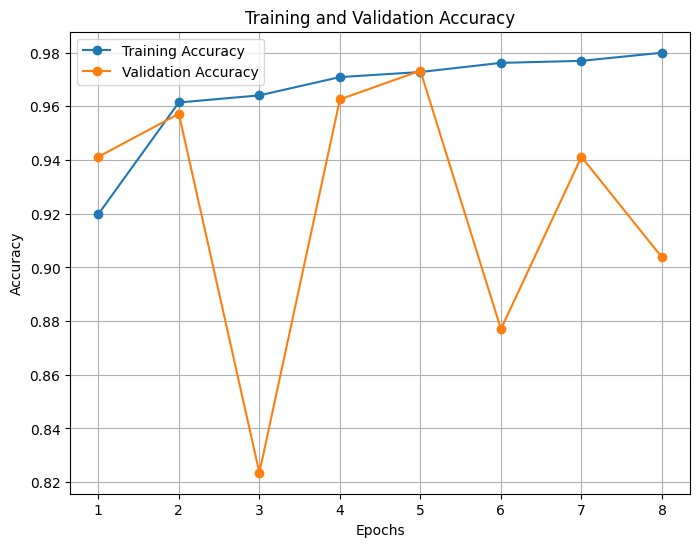

In [28]:
import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Extract epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


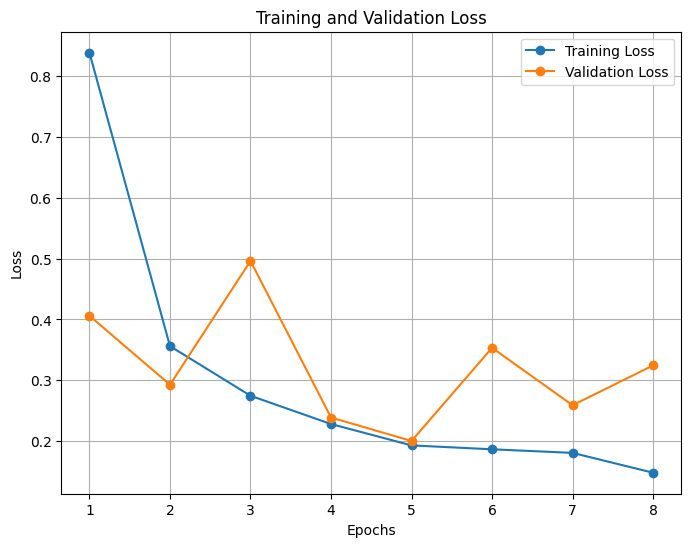

In [29]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract epochs
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
